In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outcomes = pd.read_csv("city-of-london/city-of-london_outcomes.csv")
sas = pd.read_csv("city-of-london/city-of-london_stop_and_search.csv")
street = pd.read_csv("city-of-london/city-of-london_street.csv")

In [3]:
outcomes.head()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,0,7d7fe3b1924bbac8dec539694fa9f9be740f3eb5c9323c...,2012-01,City of London Police,City of London Police,-0.080376,51.517244,On or near Supermarket,E01032739,City of London 001F,Court case unable to proceed
1,1,a5a4bdda85df3afbd668b78dcee3d6738c7f1c3990ae96...,2012-01,City of London Police,City of London Police,-0.078393,51.515728,On or near CLOTHIER STREET,E01000005,City of London 001E,Offender given community sentence
2,2,abdaa52abae374f95acb1990ff50f81f67935a488a9d83...,2012-01,City of London Police,City of London Police,-0.096363,51.513377,On or near NEW CHANGE,E01032739,City of London 001F,Offender given conditional discharge
3,3,2f5cb65af663340ccc4c197637d14bdc6d90c4b2859939...,2012-01,City of London Police,City of London Police,-0.100179,51.514158,On or near Shopping Area,E01032739,City of London 001F,Offender sent to prison
4,4,78d165b8b3c6fb3b5d654e8aa9e1f3f7850e559faf7541...,2012-01,City of London Police,City of London Police,-0.109155,51.516668,On or near FETTER LANE,E01032740,City of London 001G,Offender sent to prison


In [4]:
street.head()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,0,NaN,2010-12,City of London Police,City of London Police,-0.112952,51.518267,On or near Southampton Buildings,E01000914,Camden 028B,Vehicle crime,NaN,NaN
1,1,NaN,2010-12,City of London Police,City of London Police,-0.114940,51.518632,On or near Brownlow Street,E01000914,Camden 028B,Other crime,NaN,NaN
2,2,NaN,2010-12,City of London Police,City of London Police,-0.112952,51.518267,On or near Southampton Buildings,E01000914,Camden 028B,Other crime,NaN,NaN
3,3,NaN,2010-12,City of London Police,City of London Police,-0.112952,51.518267,On or near Southampton Buildings,E01000914,Camden 028B,Other crime,NaN,NaN
4,4,NaN,2010-12,City of London Police,City of London Police,-0.125742,51.516368,On or near Grape Street,E01000919,Camden 028D,Anti-social behaviour,NaN,NaN


In [5]:
sas.head()

,Unnamed: 0,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,0,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,False
1,1,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
2,2,Person search,2015-03-02T18:45:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,True,True
3,3,Person search,2015-03-02T19:15:00+00:00,NaN,NaN,NaN,NaN,Male,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
4,4,Person and Vehicle search,2015-03-03T15:50:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,True


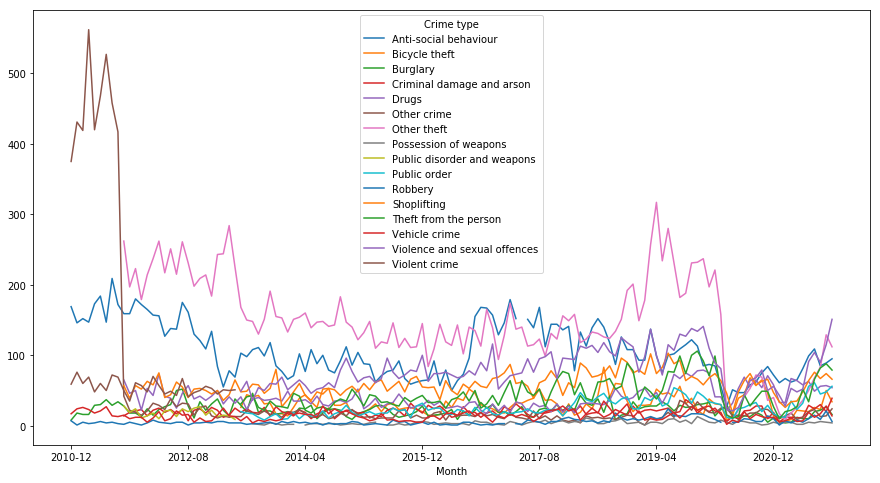

In [40]:
street.groupby(['Month', 'Crime type'])['Crime type'].count().unstack().plot(figsize = (15,8))  

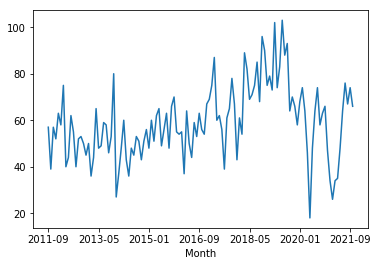

In [48]:
shop = street[street["Crime type"] == "Shoplifting"]
shop.groupby(['Month'])['Crime type'].count().plot()

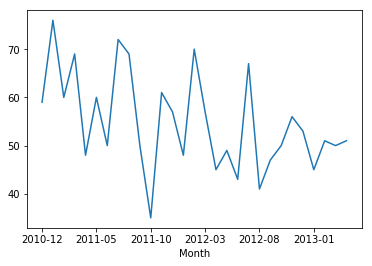

In [49]:
vio = street[street["Crime type"] == "Violent crime"]
vio.groupby(['Month'])['Crime type'].count().plot()

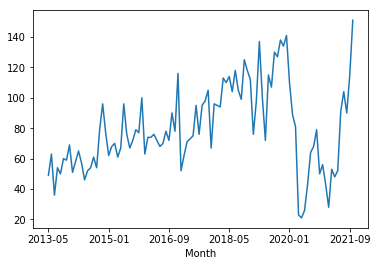

In [50]:
vio = street[street["Crime type"] == "Violence and sexual offences"]
vio.groupby(['Month'])['Crime type'].count().plot()

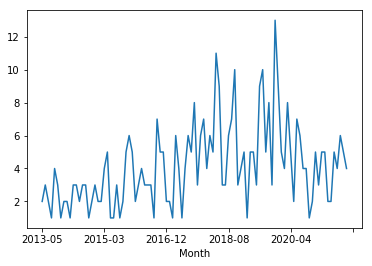

In [52]:
weapon = street[street["Crime type"] == "Possession of weapons"]
weapon.groupby(['Month'])['Crime type'].count().plot()

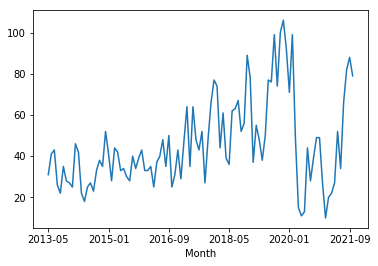

In [55]:
weapon = street[street["Crime type"] == "Theft from the person"]
weapon.groupby(['Month'])['Crime type'].count().plot()

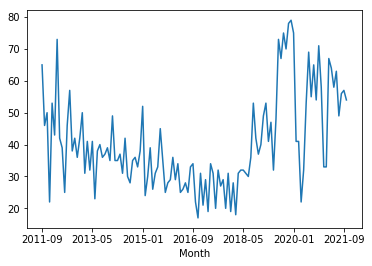

In [53]:
drugs = street[street["Crime type"] == "Drugs"]
drugs.groupby(['Month'])['Crime type'].count().plot()

In [ ]:
street.groupby(['Month', 'LSOA name'])['LSOA code'].count().unstack().plot(figsize = (15,8))  

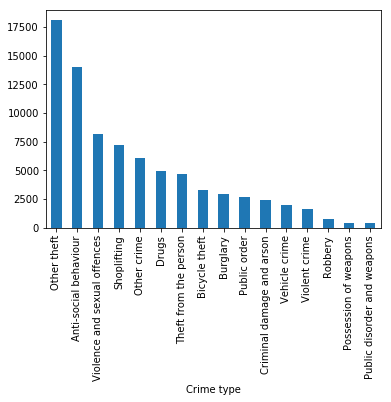

In [37]:
arrests = pd.Series(street.groupby("Crime type")["Crime type"].count().sort_values(ascending=False))
arrests.plot.bar()

In [29]:
lsoa = pd.Series(street.groupby("LSOA name")["LSOA name"].count().sort_values(ascending=False))
lsoa.plot.bar(figsize = (30, 5))

LSOA name
City of London 001F    48608
City of London 001G    10559
City of London 001E     5306
City of London 001B     3059
City of London 001A     2414
                       ...  
Hackney 017A               1
Newham 012A                1
Newham 009C                1
Newham 001B                1
Camden 015D                1
Name: LSOA name, Length: 179, dtype: int64

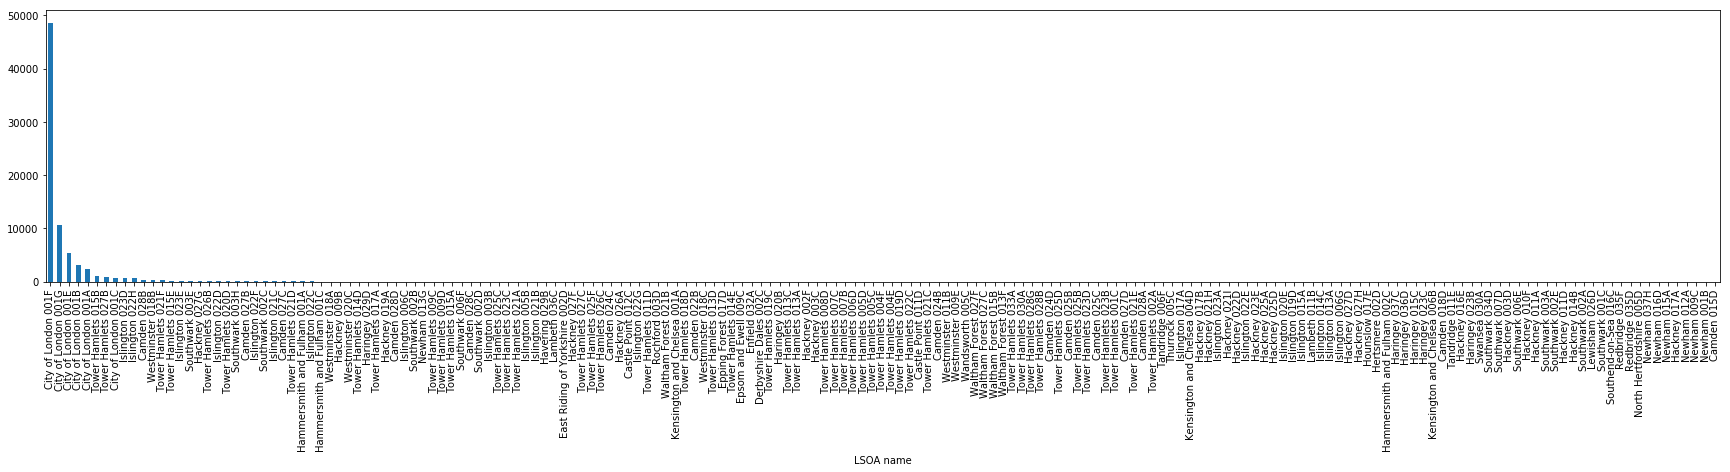

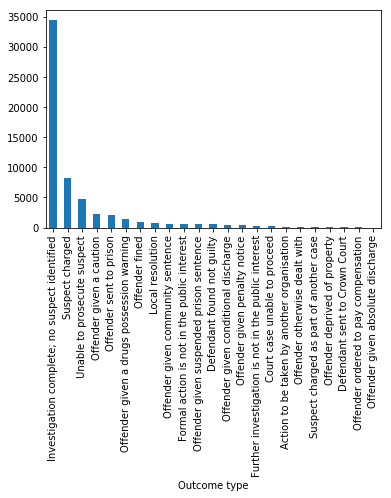

In [38]:
verdicts =pd.Series(outcomes.groupby("Outcome type")["Outcome type"].count().sort_values(ascending=False))
verdicts.plot.bar()

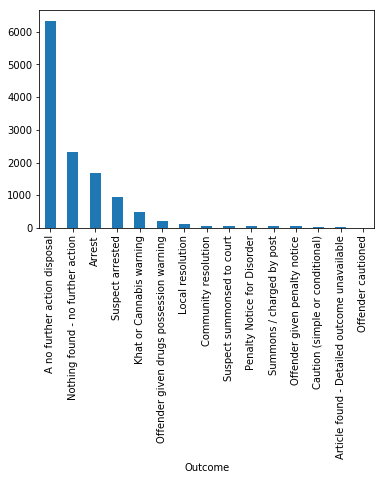

In [39]:
outcomessas = pd.Series(sas.groupby("Outcome")["Outcome"].count().sort_values(ascending=False))
outcomessas.plot.bar()